In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions

In [2]:
'''Train a Bidirectional LSTM on the IMDB sentiment classification task.

Time per epoch on Macbook Pro(2.6G Core i7): ~300s.
'''

np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,658,945
Trainable params: 2,658,945
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=[X_test, y_test])

# model.save('imdb-bidirectional-lstm.h5')

# from keras.models import load_model
# model = load_model('imdb-bidirectional-lstm.h5')

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 298s - loss: 0.4047 - acc: 0.8122 - val_loss: 0.3347 - val_acc: 0.8548
Epoch 2/5
25000/25000 [==============================] - 289s - loss: 0.2199 - acc: 0.9149 - val_loss: 0.3773 - val_acc: 0.8422
Epoch 3/5
25000/25000 [==============================] - 288s - loss: 0.1269 - acc: 0.9554 - val_loss: 0.4249 - val_acc: 0.8388
Epoch 4/5
25000/25000 [==============================] - 290s - loss: 0.0693 - acc: 0.9771 - val_loss: 0.5226 - val_acc: 0.8308
Epoch 5/5
25000/25000 [==============================] - 290s - loss: 0.0422 - acc: 0.9860 - val_loss: 0.5911 - val_acc: 0.8290


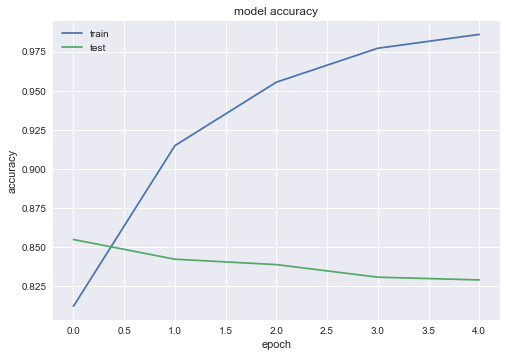

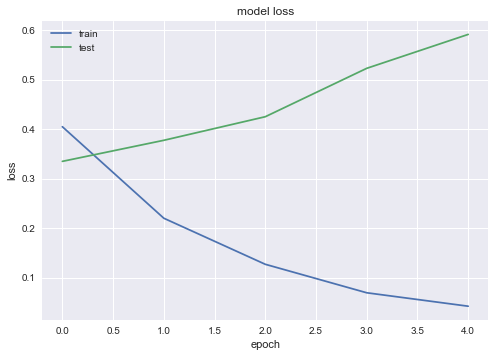

In [4]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
score = model.evaluate(X_test, y_test,
               batch_size=batch_size, verbose=1)
score

25000/25000 [==============================] - 48s    


[0.59112878184795381, 0.82899999999999996]